# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

# #         Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']      
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | shache
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | samusu
City not found. Skipping...
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | tommot
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | kibala
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | grand centre
City not found. Skipping...
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | tezu
Processing Record 16 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Pr

Processing Record 34 of Set 4 | payo
Processing Record 35 of Set 4 | meadow lake
Processing Record 36 of Set 4 | cabra
Processing Record 37 of Set 4 | brindisi
Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | husavik
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | basavakalyan
Processing Record 43 of Set 4 | kathmandu
Processing Record 44 of Set 4 | tiznit
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | matay
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | gladstone
Processing Record 4 of Set 5 | pangoa
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | bethel
Processing Record 7 of S

Processing Record 23 of Set 8 | surt
Processing Record 24 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 8 | dunedin
Processing Record 26 of Set 8 | cranbrook
Processing Record 27 of Set 8 | bonnyville
Processing Record 28 of Set 8 | cravo norte
Processing Record 29 of Set 8 | vasto
Processing Record 30 of Set 8 | hashtrud
Processing Record 31 of Set 8 | bathsheba
Processing Record 32 of Set 8 | provost
Processing Record 33 of Set 8 | pangai
Processing Record 34 of Set 8 | zhezkazgan
Processing Record 35 of Set 8 | wadena
Processing Record 36 of Set 8 | kisesa
Processing Record 37 of Set 8 | bria
Processing Record 38 of Set 8 | marawi
Processing Record 39 of Set 8 | pastos bons
Processing Record 40 of Set 8 | genhe
Processing Record 41 of Set 8 | chicama
Processing Record 42 of Set 8 | chulman
Processing Record 43 of Set 8 | punto fijo
Processing Record 44 of Set 8 | buluang
Processing Record 45 of Set 8 | mandiana
Processing Record 46 of Set 8 | halalo
City not found

Processing Record 14 of Set 12 | riyadh
Processing Record 15 of Set 12 | souillac
Processing Record 16 of Set 12 | port-cartier
Processing Record 17 of Set 12 | kampong chhnang
Processing Record 18 of Set 12 | novopavlovka
Processing Record 19 of Set 12 | tacuarembo
Processing Record 20 of Set 12 | bima
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | bairiki
Processing Record 23 of Set 12 | artyk
City not found. Skipping...
Processing Record 24 of Set 12 | lucea
Processing Record 25 of Set 12 | maragheh
Processing Record 26 of Set 12 | jijiga
Processing Record 27 of Set 12 | da nang
Processing Record 28 of Set 12 | jiazi
Processing Record 29 of Set 12 | nurota
Processing Record 30 of Set 12 | carahue
Processing Record 31 of Set 12 | yabelo
Processing Record 32 of Set 12 | ixtapa
Processing Record 33 of Set 12 | verkhnyaya inta
Processing Record 34 of Set 12 | teguldet
Processing Record 35 of Set 12 | cairns
Processing Record 36 of Set 12 | leeton
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,16.99,92,26,2.48,BR,1675819430
1,shache,38.4167,77.2406,-2.31,66,0,2.32,CN,1675819431
2,richards bay,-28.7830,32.0377,22.89,96,4,1.43,ZA,1675819221
3,tommot,58.9564,126.2925,-29.79,97,100,0.45,RU,1675819441
4,albany,42.6001,-73.9662,1.36,81,100,0.45,US,1675819442


In [6]:
city_data_df['Country'].value_counts()

RU    63
US    53
BR    25
CA    25
AU    22
      ..
GW     1
RW     1
MY     1
HU     1
SV     1
Name: Country, Length: 124, dtype: int64

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,16.99,92,26,2.48,BR,1675819430
1,shache,38.4167,77.2406,-2.31,66,0,2.32,CN,1675819431
2,richards bay,-28.7830,32.0377,22.89,96,4,1.43,ZA,1675819221
3,tommot,58.9564,126.2925,-29.79,97,100,0.45,RU,1675819441
4,albany,42.6001,-73.9662,1.36,81,100,0.45,US,1675819442


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

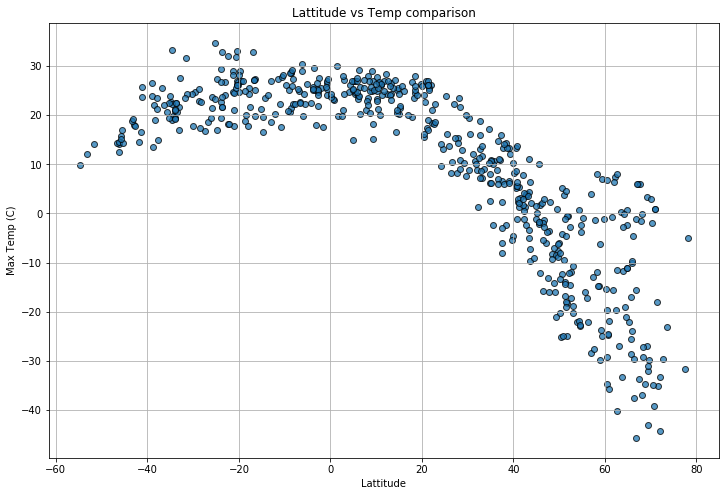

In [9]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df['Lat']
y_values = city_data_df['Max Temp']

fig1, ax1 = plt.subplots(figsize= (12,8))
plt.scatter(x_values,y_values,alpha=.75,edgecolor='black',marker="o")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (C)")
plt.title("Lattitude vs Temp comparison")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

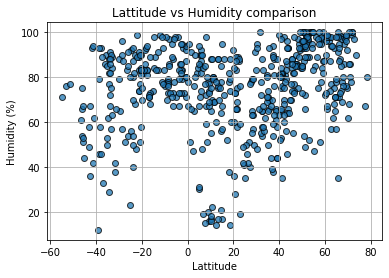

In [10]:
# Build the scatter plots for latitude vs. humidity
y2_values = city_data_df['Humidity']

plt.scatter(x_values,y2_values,alpha=.75,edgecolor='black',marker="o")


# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("Lattitude vs Humidity comparison")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

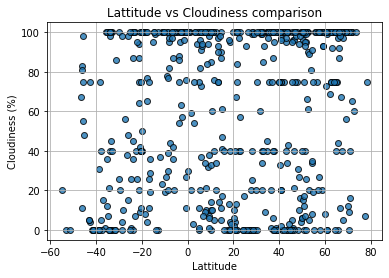

In [11]:
# Build the scatter plots for latitude vs. cloudiness
y3_values = city_data_df['Cloudiness']

plt.scatter(x_values,y3_values,alpha=.8,edgecolor='black',marker="o")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("Lattitude vs Cloudiness comparison")

plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

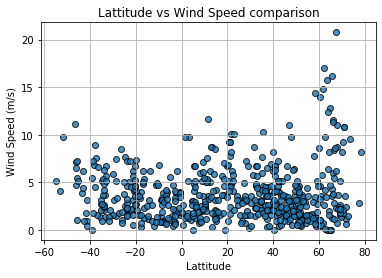

In [12]:
# Build the scatter plots for latitude vs. wind speed
y4_values = city_data_df['Wind Speed']

plt.scatter(x_values,y4_values,alpha=.8,edgecolor='black',marker="o")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Lattitude vs Wind Speed comparison")

plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
import scipy.stats as st

# Define a function to create Linear Regression plots
def linregressionplot (x_values,y_values,x_label,y_label,hemisphere,line_placement,ylim=None):
#Defining linear regression values
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    regress_values = x_values*slope + intercept
    lin_eq = f"y = {round(slope,2)} x+ {round(intercept,2)}"
#     Setting up scatter
    plt.scatter(x_values,y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0,ylim)
    plt.title(f"{hemisphere} Hemisphere: {x_label} vs {y_label}")
    plt.annotate(lin_eq,line_placement,fontsize=15,color="r")
    plt.grid()
#     Printing R Sq-values
    print(f"The r-value is: {round(rvalue,2)}")
    return plt.plot(x_values,regress_values,"r-")
    
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi= city_data_df[(city_data_df["Lat"] >= 0)]
northern_hemi_df= northern_hemi.reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shache,38.4167,77.2406,-2.31,66,0,2.32,CN,1675819431
1,tommot,58.9564,126.2925,-29.79,97,100,0.45,RU,1675819441
2,albany,42.6001,-73.9662,1.36,81,100,0.45,US,1675819442
3,georgetown,5.4112,100.3354,26.96,85,20,4.12,MY,1675819257
4,kibala,9.1104,18.3463,24.85,16,7,2.10,TD,1675819445


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi= city_data_df[(city_data_df["Lat"] < 0)]
southern_hemi_df= southern_hemi.reset_index(drop=True)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,16.99,92,26,2.48,BR,1675819430
1,richards bay,-28.7830,32.0377,22.89,96,4,1.43,ZA,1675819221
2,lorengau,-2.0226,147.2712,25.56,93,100,6.16,PG,1675819470
3,rikitea,-23.1203,-134.9692,26.67,68,7,5.00,PF,1675819439
4,mataura,-46.1927,168.8643,14.15,75,83,4.67,NZ,1675819485


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.87


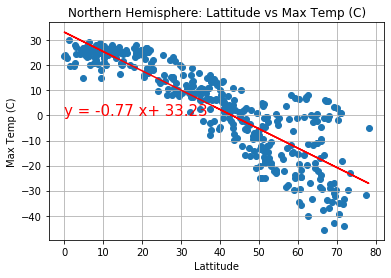

In [16]:
# Linear regression on Northern Hemisphere


x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']

linregressionplot(x_values,y_values,"Lattitude","Max Temp (C)","Northern",(0,0))

The r-value is: 0.5


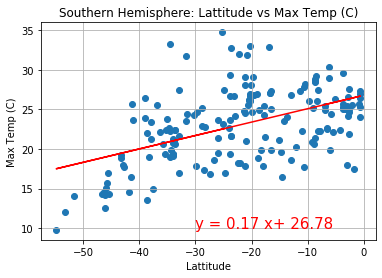

In [17]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']

linregressionplot(x_values,y_values,"Lattitude","Max Temp (C)","Southern",(-30,10))

**Discussion about the linear relationship:**  The relationship between lattitude and max tempreature within the Northern hemisphere has a strong negative correlation indicated by the -0.84 R value. The meaning of this is that as you go farther north (increase in lattitude), which will result in temperature decreasing and vice versa. Conversly, the relationship between lattitude and temp in the southern hemisphere is a weak postive relationship (indicated by the .5 R-value). As you increase in lattitude towards the equator, the tempreature increases slightly; and vice versa away from it.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4


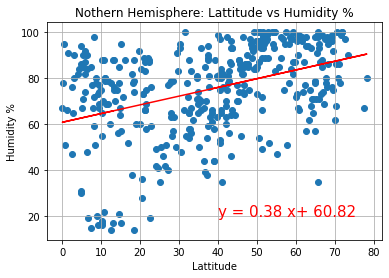

In [18]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Humidity']

linregressionplot(x_values,y_values,"Lattitude","Humidity %","Nothern",(40,20))

The r-value is: 0.4


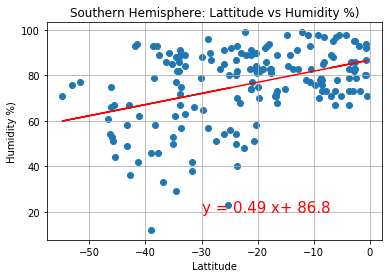

In [19]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']

linregressionplot(x_values,y_values,"Lattitude","Humidity %)","Southern",(-30,20))

**Discussion about the linear relationship:** The linear regression relationship between lattitude and humidity for both Hemispheres is a weak positive relationship. As indicative by the .4 R-value and the gradual incline of the regression line, the increase in lattitude results in a small increase in humidity and vice-versa. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15


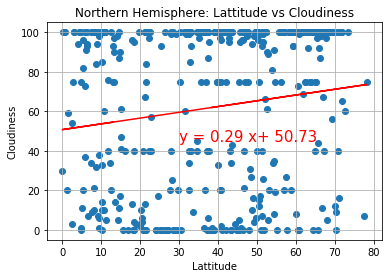

In [20]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']

linregressionplot(x_values,y_values,"Lattitude","Cloudiness","Northern",(30,45))

The r-value is: 0.4


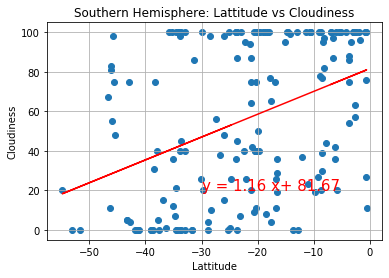

In [21]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']

linregressionplot(x_values,y_values,"Lattitude","Cloudiness","Southern",(-30,20))

**Discussion about the linear relationship:** Similar to the previous relationship, this linear relationship between lattitude and cloudiness is a direct weak positive relationship. Therefore, an increase in lattitude (in both hemispheres), results in a slight increase in cloudiness. As demonstrated by the various data points that cannnot be explained by the regression line (and weak R-Values), one can infer that nothing meaningful can be interpreted using lattitude to predict a change in cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09


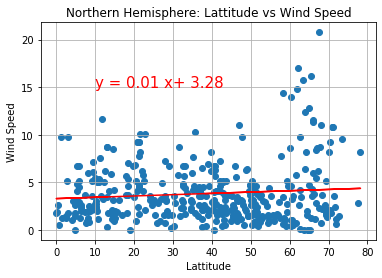

In [22]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']

linregressionplot(x_values,y_values,"Lattitude","Wind Speed","Northern",(10,15))

The r-value is: -0.31


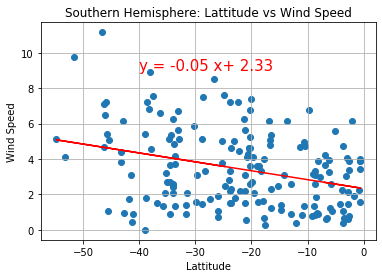

In [23]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']

linregressionplot(x_values,y_values,"Lattitude","Wind Speed","Southern",(-40,9))

**Discussion about the linear relationship:** The relationship between lattitude and windspeed (in Northern Hemisphere) is one of a very weak positive relationship. As indicated by the flat regression line and weak R-value, the positive relationship is very weak and cannot be used to predict windspeed with increase or decrease in lattitude. Conversly, the relationship within the southern hemisphere is one of a weak negative relationship. An increase in lattitude towards the equator will have a slight decrease in wind speed. Once again, the predictive use of lattitude versus windspeed is limited.